In [395]:
# 导入相关依赖包

from sklearn.datasets import load_iris # 导入鸢尾花数据集

import seaborn as sns # 导入seaborn绘图库
import pandas as pd # 导入数据处理依赖库
import matplotlib.pyplot as plt # 导入绘图库

from sklearn.model_selection import train_test_split # 分割数据集
from sklearn.preprocessing import StandardScaler # 数据标准化
from sklearn.neighbors import KNeighborsClassifier # KNN算法的分类器
from sklearn.metrics import accuracy_score # 模型评估，计算模型准确率

In [396]:
# 1. 加载数据集，并查看数据集
iris = load_iris()

In [397]:
# 2. 划分数据集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=66)

In [398]:
# 3. 数据标准化
transformer = StandardScaler()
# 仅对特征列进行标准化，即：对x_train和x_test进行标准化
x_train = transformer.fit_transform(x_train) # fit_transform表示先拟合数据，再进行转换，是对训练集进行标准化，仅在第一次标准化时使用，一般用于处理训练集
x_test = transformer.transform(x_test) # transform表示直接转换，在重新进行标准化的时候使用，一般用于处理测试集

In [399]:
# 5. 构建KNN分类器
knn_class = KNeighborsClassifier()
print(knn_class)

KNeighborsClassifier()


# 交叉验证法验证结果
![img](images/image.png)

# 网格搜索法选择超参数

- 将所有的设定好的超参数进行交叉验证，选择出最优的超参数组合，进而获取超参数

In [400]:
# 6. 使用校验验证网格搜素，选择超参数
param_grid = {'n_neighbors': [i for i in range(1, 31)]} # 定义超参数搜索范围


# 其中n_splits表示交叉验证的折数，shuffle表示是否在每次分折前进行洗牌，random_state表示随机种子，用于复现结果
from sklearn.model_selection import GridSearchCV # 导入网格搜索包

# 使用网格搜索法进行超参数选择
# 先传入需要调参的模型
# 再传入超参数搜索范围
# 最后传入交叉验证的折数
knn_class = GridSearchCV(knn_class, param_grid, cv=10) # cv表示交叉验证的折数，这里设置为5折交叉验证
# 这里一共运行了10个超参数，每个超参数进行了5折交叉验证，一共运行了50次模型训练和验证

# 7. 模型训练
knn_class.fit(x_train, y_train)

# 打印超参数选择结果
print("最佳超参数：", knn_class.best_params_)
print("最佳评分：", knn_class.best_score_)
print("最优估计器对象：", knn_class.best_estimator_)
print("所有结果：", knn_class.cv_results_)

最佳超参数： {'n_neighbors': 7}
最佳评分： 0.975
最优估计器对象： KNeighborsClassifier(n_neighbors=7)
所有结果： {'mean_fit_time': array([0.00070179, 0.00060022, 0.00049887, 0.00039876, 0.00039849,
       0.00031888, 0.00060124, 0.00030026, 0.0003999 , 0.00030022,
       0.00060079, 0.00064771, 0.00047305, 0.00064449, 0.00040135,
       0.0004993 , 0.00049906, 0.00049908, 0.00029986, 0.00049913,
       0.00059826, 0.00032878, 0.0002511 , 0.00040698, 0.0005353 ,
       0.00040026, 0.00050035, 0.00030129, 0.00040162, 0.00040309]), 'std_fit_time': array([0.00045948, 0.00049009, 0.00049887, 0.00048838, 0.00048806,
       0.00048923, 0.00049092, 0.00045866, 0.00048978, 0.00045862,
       0.00049055, 0.00054616, 0.00059055, 0.00053959, 0.00049157,
       0.00049932, 0.00049906, 0.0004991 , 0.00045804, 0.00049914,
       0.00048849, 0.00050768, 0.00033619, 0.00049897, 0.0005448 ,
       0.00049022, 0.00050036, 0.00046024, 0.0004919 , 0.00049371]), 'mean_score_time': array([0.00101945, 0.00112669, 0.00100191, 0.00110

In [401]:
# 8. 模型评估

knn_class = knn_class.best_estimator_
print(knn_class)
# 模型训练
knn_class.fit(x_train, y_train)

# 模型预测
y_pred = knn_class.predict(x_test)

# 模型评估
print("模型准确率：", accuracy_score(y_test, y_pred))

KNeighborsClassifier(n_neighbors=7)
模型准确率： 0.9333333333333333


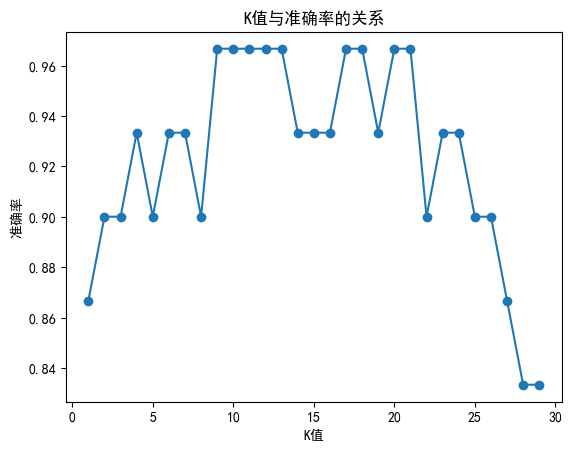

In [402]:
# 正常显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 尝试不同的K值并绘制准确率变化
k_range = range(1,30)
accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# 绘制K值与准确率的关系
plt.plot(k_range, accuracies, marker='o')
plt.title("K值与准确率的关系")
plt.xlabel("K值")
plt.ylabel("准确率")
plt.show()